In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [12]:
# plotting the global annual vertical thermal structure

data = xr.open_dataset('air.mon.ltm.nc')

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [13]:
# reading only air variable
data = data.air

In [14]:
data

<xarray.DataArray 'air' (time: 12, level: 17, lat: 73, lon: 144)>
[2144448 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

In [15]:
# taking mean of lat,lon and time 
data = data.mean(dim=['lat','lon','time'])

In [16]:
data

<xarray.DataArray 'air' (level: 17)>
array([281.26266, 277.56396, 274.45526, 267.00372, 260.8889 , 252.58217,
       242.07874, 229.63977, 223.56425, 218.62984, 213.85156, 209.06587,
       209.71344, 212.36491, 216.39   , 220.05284, 227.04445],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

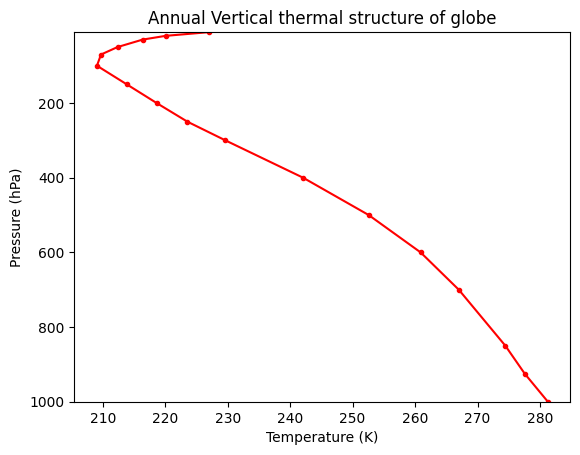

In [17]:
pressure_levels = data.level

plt.plot(data,pressure_levels,'r.-')
plt.ylim(max(pressure_levels),min(pressure_levels))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Annual Vertical thermal structure of globe')
plt.show()

### Vertical thermal structure in summer months of June, July and August

#### Global thermal structure

In [24]:
summer_globe = xr.open_dataset('global_JJAS.nc')
summer_globe

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 4, bnds: 2, lon: 144, lat: 73, level: 17)
Coordinates:
  * time              (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat               (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Wed Feb 08 20:45:25 2023: cdo selmon,6,7,...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [25]:
summer_globe = summer_globe.air

In [26]:
summer_globe

<xarray.DataArray 'air' (time: 4, level: 17, lat: 73, lon: 144)>
[714816 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [27]:
# take the mean of latitude, longitude and time axis

thermal_summer_globe = summer_globe.mean(dim=['lat','lon','time'])

In [28]:
thermal_summer_globe

<xarray.DataArray 'air' (level: 17)>
array([283.27097, 279.48773, 276.16748, 268.4634 , 262.32635, 254.04512,
       243.43504, 230.26256, 223.46533, 217.98868, 212.77255, 208.00699,
       208.86104, 211.1167 , 214.64561, 218.21786, 225.31616],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

In [29]:
pressure_levels_summer_globe = summer_globe.level

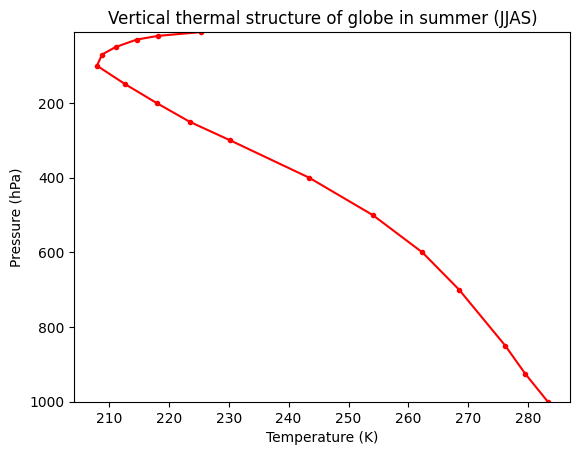

In [32]:
plt.plot(thermal_summer_globe,pressure_levels_summer_globe,'r.-')
plt.ylim(max(pressure_levels_summer_globe),min(pressure_levels_summer_globe))
# plt.plot(data,pressure_levels,'b.-')
# plt.ylim(max(pressure_levels),min(pressure_levels))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of globe in summer (JJAS)')
plt.show()

#### Thermal structure in the Tropics

In [47]:
tropics_summer_data = xr.open_dataset('tropics_JJAS.nc')
tropics_summer_data

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 4, bnds: 2, lon: 144, lat: 25, level: 17)
Coordinates:
  * time              (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat               (lat) float32 30.0 27.5 25.0 22.5 ... -25.0 -27.5 -30.0
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Wed Feb 08 20:46:14 2023: cdo selmon,6,7,...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [48]:
tropics_summer = tropics_summer_data.air

In [49]:
tropics_summer 

<xarray.DataArray 'air' (time: 4, level: 17, lat: 25, lon: 144)>
[244800 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 30.0 27.5 25.0 22.5 20.0 ... -22.5 -25.0 -27.5 -30.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [50]:
# mean of latitude, longitude and time axis

thermal_summer_tropics = tropics_summer.mean(dim=['lat','lon','time'])


In [51]:
thermal_summer_tropics

<xarray.DataArray 'air' (level: 17)>
array([298.09924, 293.4411 , 289.63022, 281.8173 , 274.8832 , 266.30634,
       255.86945, 241.1162 , 231.43672, 220.53004, 208.4385 , 199.14172,
       203.09233, 209.26486, 216.57417, 221.8705 , 229.80687],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

In [55]:
pressure_levels_summer_tropics = tropics_summer.level 

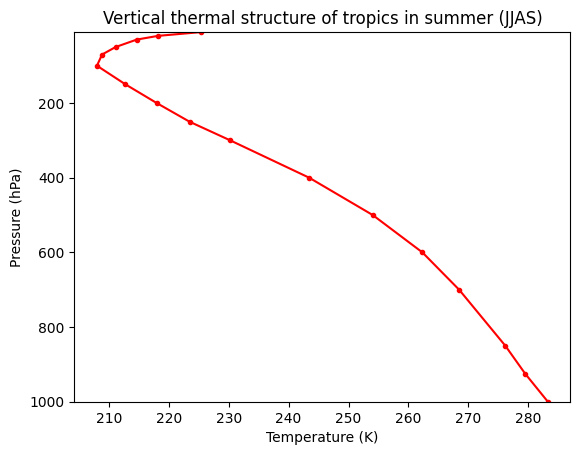

In [56]:
plt.plot(thermal_summer_globe, pressure_levels_summer_tropics, 'r.-')
plt.ylim(max(pressure_levels_summer_tropics),min(pressure_levels_summer_tropics))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of tropics in summer (JJAS)')
plt.show()

#### Vertical thermal structure in the North Pole

In [58]:
pole_summer_data = xr.open_dataset('poles_JJAS.nc')
pole_summer_data

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 4, bnds: 2, lon: 144, lat: 9, level: 17)
Coordinates:
  * time              (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat               (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Wed Feb 08 20:47:46 2023: cdo selmon,6,7,...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [59]:
pole_summer_data = pole_summer_data.air

In [60]:
pole_summer_data

<xarray.DataArray 'air' (time: 4, level: 17, lat: 9, lon: 144)>
[88128 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [61]:
# taking mean of latitude, longitued and time axis 

thermal_summer_pole = pole_summer_data.mean(dim=['lat','lon','time'])

In [62]:
thermal_summer_pole

<xarray.DataArray 'air' (level: 17)>
array([274.53555, 272.77338, 270.56332, 263.55627, 257.10596, 248.50714,
       237.82784, 227.51146, 225.3482 , 226.66302, 227.46648, 227.3214 ,
       226.94148, 226.88725, 227.71436, 229.9419 , 236.18774],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

In [63]:
pressure_levels_summer_pole = pole_summer_data.level

In [64]:
pressure_levels_summer_pole

<xarray.DataArray 'level' (level: 17)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes:
    standard_name:       air_pressure
    long_name:           Level
    units:               millibar
    positive:            down
    axis:                Z
    actual_range:        [1000.   10.]
    GRIB_id:             100
    GRIB_name:           hPa
    coordinate_defines:  point

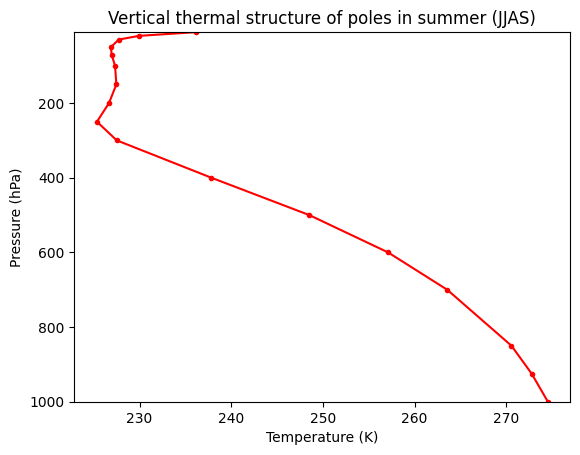

In [66]:
plt.plot(thermal_summer_pole,pressure_levels_summer_pole,'r.-')
plt.ylim(max(pressure_levels_summer_pole),min(pressure_levels_summer_pole))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of poles in summer (JJAS)')
plt.show()

#### Vertical thermal structure over India

In [68]:
india_summer_data = xr.open_dataset('india_JJAS.nc')
india_summer_data

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 4, bnds: 2, lon: 21, lat: 12, level: 17)
Coordinates:
  * time              (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon               (lon) float32 60.0 62.5 65.0 67.5 ... 105.0 107.5 110.0
  * lat               (lat) float32 35.0 32.5 30.0 27.5 ... 15.0 12.5 10.0 7.5
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Wed Feb 08 20:48:14 2023: cdo selmon,6,7,...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [69]:
india_summer_data = india_summer_data.air

In [70]:
india_summer_data

<xarray.DataArray 'air' (time: 4, level: 17, lat: 12, lon: 21)>
[17136 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
  * lon      (lon) float32 60.0 62.5 65.0 67.5 70.0 ... 102.5 105.0 107.5 110.0
  * lat      (lat) float32 35.0 32.5 30.0 27.5 25.0 ... 17.5 15.0 12.5 10.0 7.5
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [71]:
# taking the mean along latitude, longitude and time axis
thermal_summer_india = india_summer_data.mean(dim=['lat','lon','time'])


In [72]:
thermal_summer_india

<xarray.DataArray 'air' (level: 17)>
array([303.13052, 298.7567 , 294.54663, 284.96597, 277.5998 , 269.22397,
       258.97723, 245.25677, 235.55016, 223.76543, 209.50793, 196.10158,
       201.09988, 209.24962, 217.33495, 222.59099, 230.29086],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

In [73]:
pressure_levels_summer_india = india_summer_data.level

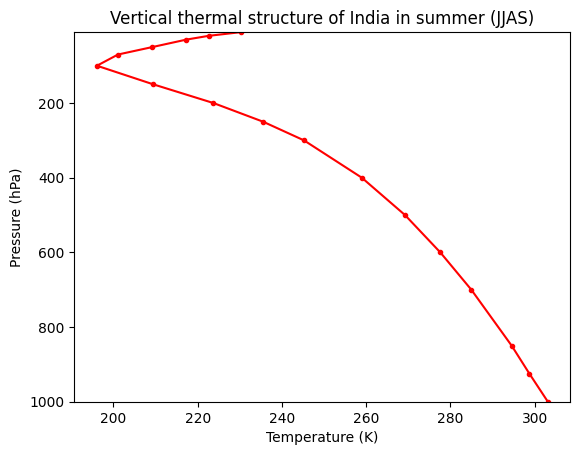

In [74]:
plt.plot(thermal_summer_india,pressure_levels_summer_india,'r.-')
plt.ylim(max(pressure_levels_summer_india),min(pressure_levels_summer_india))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of India in summer (JJAS)')
plt.show()

### Vertical thermal structure in winter months of December, January and February

#### Vertical thermal structure of entire globe

In [77]:
winter_globe_data = xr.open_dataset('global_DJF.nc')
winter_globe_data

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 3, bnds: 2, lon: 144, lat: 73, level: 17)
Coordinates:
  * time              (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat               (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Thu Feb 09 01:49:49 2023: cdo selmon,12,1...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [78]:
winter_globe_data = winter_globe_data.air

In [79]:
winter_globe_data

<xarray.DataArray 'air' (time: 3, level: 17, lat: 73, lon: 144)>
[536112 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [80]:
# taking the mean of latitude, longitude and time axis
thermal_winter_globe = winter_globe_data.mean(dim=['lat','lon','time'])

In [81]:
thermal_winter_globe

<xarray.DataArray 'air' (level: 17)>
array([279.6443 , 276.1119 , 273.34332, 266.2444 , 260.03622, 251.61855,
       241.19781, 229.4242 , 223.9662 , 219.50189, 215.05403, 210.18614,
       210.64803, 213.67676, 218.18764, 222.06381, 229.4398 ],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

In [82]:
pressure_levels_winter_globe = winter_globe_data.level

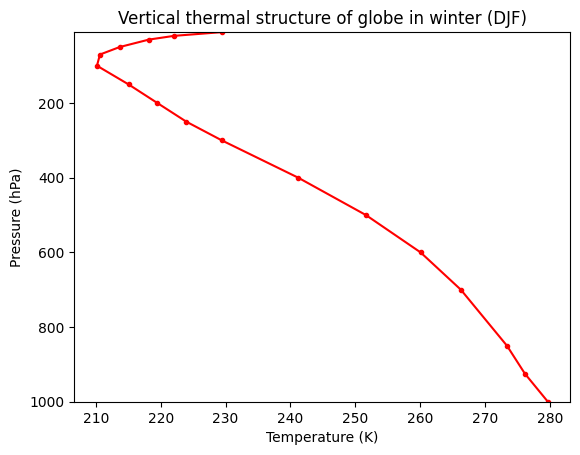

In [83]:
plt.plot(thermal_winter_globe,pressure_levels_winter_globe,'r.-')
plt.ylim([max(pressure_levels_winter_globe),min(pressure_levels_winter_globe)])
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of globe in winter (DJF)')
plt.show()

#### Vertical thermal structure in the Tropics

In [85]:
winter_tropics_data = xr.open_dataset('tropics_DJF.nc')
winter_tropics_data

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 3, bnds: 2, lon: 144, lat: 25, level: 17)
Coordinates:
  * time              (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat               (lat) float32 30.0 27.5 25.0 22.5 ... -25.0 -27.5 -30.0
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Thu Feb 09 01:51:13 2023: cdo selmon,12,1...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [86]:
winter_tropics = winter_tropics_data.air

In [87]:
winter_tropics

<xarray.DataArray 'air' (time: 3, level: 17, lat: 25, lon: 144)>
[183600 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 30.0 27.5 25.0 22.5 20.0 ... -22.5 -25.0 -27.5 -30.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [88]:
# taking the mean of latitude, longitude and time axis
thermal_winter_tropics = winter_tropics.mean(dim=['lat','lon','time'])

In [89]:
pressure_levels_winter_tropics = winter_tropics.level

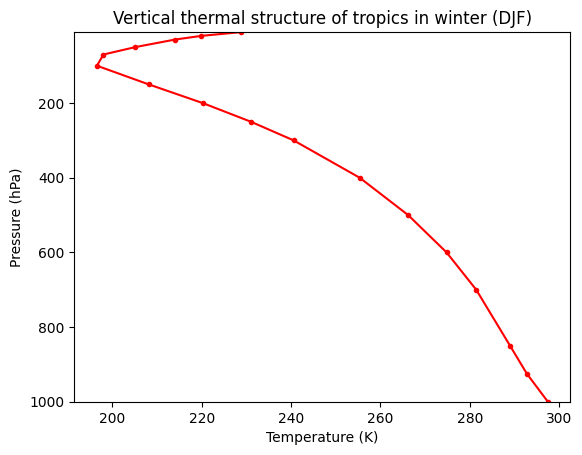

In [90]:
plt.plot(thermal_winter_tropics,pressure_levels_winter_tropics,'r.-')
plt.ylim(max(pressure_levels_winter_tropics),min(pressure_levels_winter_tropics))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of tropics in winter (DJF)')
plt.show()

#### Vertical thermal structure in the North Pole

In [92]:
winter_poles_data = xr.open_dataset('poles_DJF.nc')
winter_poles_data

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 3, bnds: 2, lon: 144, lat: 9, level: 17)
Coordinates:
  * time              (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat               (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Thu Feb 09 01:51:29 2023: cdo selmon,12,1...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [93]:
winter_poles = winter_poles_data.air

In [94]:
winter_poles

<xarray.DataArray 'air' (time: 3, level: 17, lat: 9, lon: 144)>
[66096 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [95]:
# taking the mean of latitude,longitude and time axis
thermal_winter_poles = winter_poles.mean(dim=['lat','lon','time'])

In [96]:
pressure_levels_winter_poles = winter_poles.level


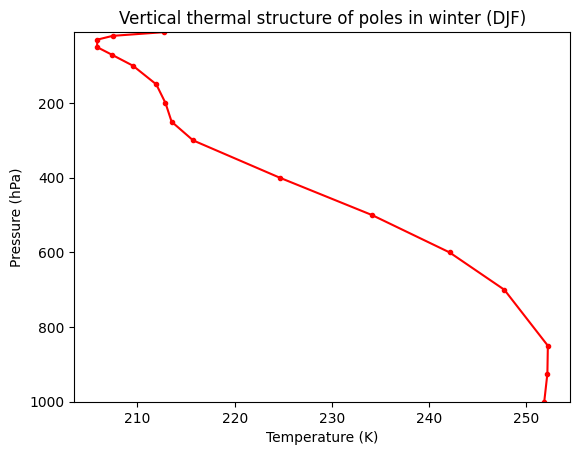

In [97]:
plt.plot(thermal_winter_poles,pressure_levels_winter_poles,'r.-')
plt.ylim(max(pressure_levels_winter_poles),min(pressure_levels_winter_poles))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of poles in winter (DJF)')
plt.show()

#### Vertical thermal structure over India

In [99]:
winter_india_data = xr.open_dataset('india_DJF.nc')
winter_india_data

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:           (time: 3, bnds: 2, lon: 21, lat: 12, level: 17)
Coordinates:
  * time              (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon               (lon) float32 60.0 62.5 65.0 67.5 ... 105.0 107.5 110.0
  * lat               (lat) float32 35.0 32.5 30.0 27.5 ... 15.0 12.5 10.0 7.5
  * level             (level) float32 1e+03 925.0 850.0 700.0 ... 30.0 20.0 10.0
Dimensions without coordinates: bnds
Data variables:
    climatology_bnds  (time, bnds) float64 ...
    air               (time, level, lat, lon) float32 ...
    valid_yr_count    (time, level, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 2.0.4 (htt...
    Conventions:                    CF-1.0
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    ...                             ...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Thu Feb 09 01:51:44 2023: cdo selmon,12,1...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    CDO:                            Climate Data Operators version 2.0.4 (htt...

In [100]:
winter_india = winter_india_data.air

In [101]:
winter_india

<xarray.DataArray 'air' (time: 3, level: 17, lat: 12, lon: 21)>
[12852 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon      (lon) float32 60.0 62.5 65.0 67.5 70.0 ... 102.5 105.0 107.5 110.0
  * lat      (lat) float32 35.0 32.5 30.0 27.5 25.0 ... 17.5 15.0 12.5 10.0 7.5
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes: (12/13)
    standard_name:  air_temperature
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    ...             ...
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    cell_methods:   time: mean (monthly from 6-hourly values)
    actual_range:   [183.01205 314.30197]

In [102]:
# taking the mean of latitude, longitude and time axis
thermal_winter_india = winter_india.mean(dim=['lat','lon','time'])

In [103]:
thermal_winter_india

<xarray.DataArray 'air' (level: 17)>
array([294.14508, 289.7215 , 285.6626 , 277.78296, 271.59042, 263.04602,
       251.91559, 237.58693, 229.01224, 219.68773, 209.24731, 198.71185,
       199.65005, 206.38402, 214.6685 , 219.62547, 227.95862],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

In [104]:
pressure_levels_winter_india = winter_india.level

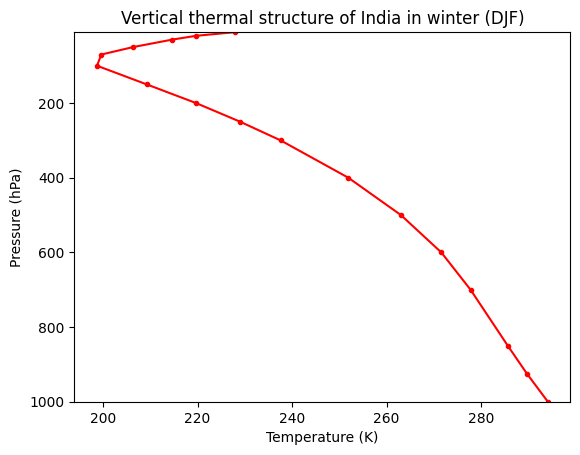

In [105]:
plt.plot(thermal_winter_india,pressure_levels_winter_india,'r.-')
plt.ylim(max(pressure_levels_winter_india),min(pressure_levels_winter_india))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of India in winter (DJF)')
plt.show()

## Analysis of the vertical thermal structure

In [107]:
annual_files = ['gloabl','tropics','poles','india']
winter_files = ['global_DJF','tropics_DJF','poles_DJF','india_DJF']
summer_files = ['global_JJAS','tropics_JJAS','poles_JJAS','india_JJAS']

In [112]:
# taking all the global datasets in one array and plotting them together to see if there are any visible differences

global_datasets = []
pressure_levels_global = []
for i in (['global','global_DJF','global_JJAS']):
    data = xr.open_dataset(i+'.nc')
    data = data.air
    thermal = data.mean(dim=['lat','lon','time'])
    pressure_levels = data.level
    global_datasets.append(thermal)
    pressure_levels_global.append(pressure_levels)


/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: Serializati

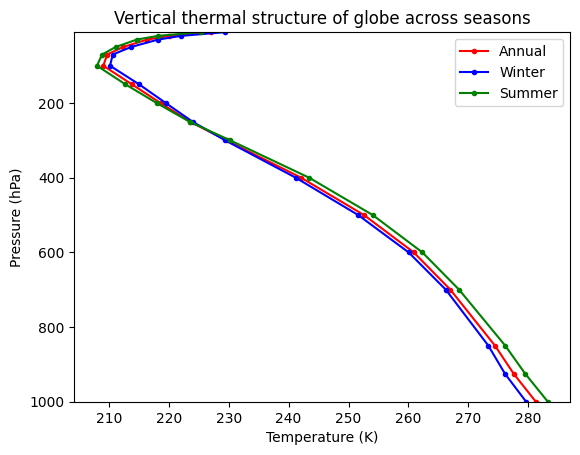

In [114]:
# plotting them all together

plt.plot(global_datasets[0],pressure_levels_global[0],'r.-',label='Annual')
plt.ylim(max(pressure_levels_global[0]),min(pressure_levels_global[0]))
plt.plot(global_datasets[1],pressure_levels_global[1],'b.-',label='Winter')
plt.ylim(max(pressure_levels_global[1]),min(pressure_levels_global[1]))
plt.plot(global_datasets[2],pressure_levels_global[2],'g.-',label='Summer')
plt.ylim(max(pressure_levels_global[2]),min(pressure_levels_global[2]))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of globe across seasons')
plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()

In [117]:
# taking all the tropics datasets in one array and plotting them together to see if there are any visible differences

tropics_datasets = []
pressure_levels_tropics = []

for i in (['tropics','tropics_JJAS','tropics_DJF']):
    data = xr.open_dataset(i+'.nc')
    data = data.air
    thermal = data.mean(dim=['lat','lon','time'])
    pressure_levels = data.level
    tropics_datasets.append(thermal)
    pressure_levels_tropics.append(pressure_levels)

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: Serializati

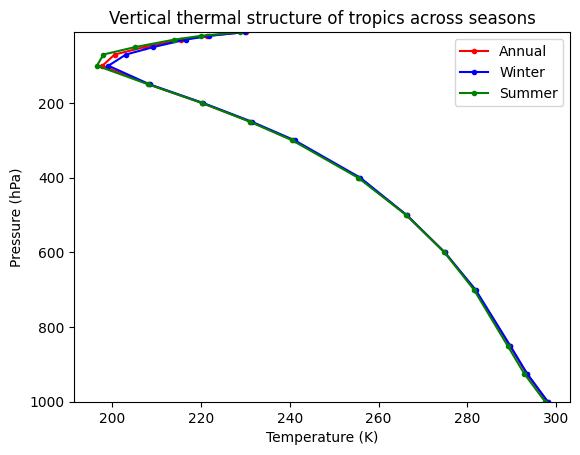

In [118]:
# plotting them all together

plt.plot(tropics_datasets[0],pressure_levels_tropics[0],'r.-',label='Annual')
plt.ylim(max(pressure_levels_tropics[0]),min(pressure_levels_tropics[0]))
plt.plot(tropics_datasets[1],pressure_levels_tropics[1],'b.-',label='Winter')
plt.ylim(max(pressure_levels_tropics[1]),min(pressure_levels_tropics[1]))
plt.plot(tropics_datasets[2],pressure_levels_tropics[2],'g.-',label='Summer')
plt.ylim(max(pressure_levels_tropics[2]),min(pressure_levels_tropics[2]))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of tropics across seasons')
plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()

In [119]:
# taking all the poles datasets in one array and plotting them together to see if there are any visible differences

poles_datasets = []
pressure_levels_poles = []

for i in (['poles','poles_JJAS','poles_DJF']):
    data = xr.open_dataset(i+'.nc')
    data = data.air
    thermal = data.mean(dim=['lat','lon','time'])
    pressure_levels = data.level
    poles_datasets.append(thermal)
    pressure_levels_poles.append(pressure_levels)

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: Serializati

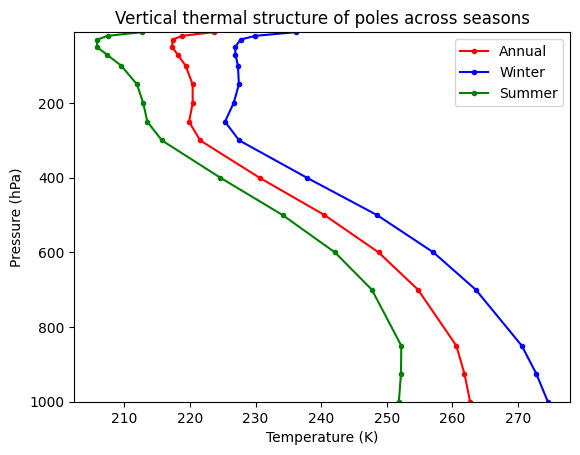

In [120]:
# plotting them all together to see any visible differences

plt.plot(poles_datasets[0],pressure_levels_poles[0],'r.-',label='Annual')
plt.ylim(max(pressure_levels_poles[0]),min(pressure_levels_poles[0]))
plt.plot(poles_datasets[1],pressure_levels_poles[1],'b.-',label='Winter')
plt.ylim(max(pressure_levels_poles[1]),min(pressure_levels_poles[1]))
plt.plot(poles_datasets[2],pressure_levels_poles[2],'g.-',label='Summer')
plt.ylim(max(pressure_levels_poles[2]),min(pressure_levels_poles[2]))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of poles across seasons')
plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()

In [121]:
# taking all india datasets in one array and plotting them together to see if there are any visible differences

india_datasets = []
pressure_levels_india = []

for i in (['india','india_JJAS','india_DJF']):
    data = xr.open_dataset(i+'.nc')
    data = data.air
    thermal = data.mean(dim=['lat','lon','time'])
    pressure_levels = data.level
    india_datasets.append(thermal)
    pressure_levels_india.append(pressure_levels)

/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: Serializati

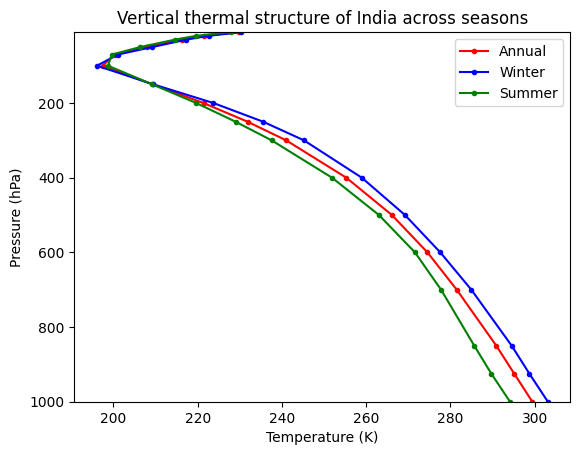

In [122]:
# plotting them all together to see any visible differences

plt.plot(india_datasets[0],pressure_levels_india[0],'r.-',label='Annual')
plt.ylim(max(pressure_levels_india[0]),min(pressure_levels_india[0]))
plt.plot(india_datasets[1],pressure_levels_india[1],'b.-',label='Winter')
plt.ylim(max(pressure_levels_india[1]),min(pressure_levels_india[1]))
plt.plot(india_datasets[2],pressure_levels_india[2],'g.-',label='Summer')
plt.ylim(max(pressure_levels_india[2]),min(pressure_levels_india[2]))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical thermal structure of India across seasons')
plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()

In [124]:
# taking the datasets of different regions and plotting them together to see if there are any visible differences

annual_files = ['global','tropics','poles','india']
winter_files = ['global_DJF','tropics_DJF','poles_DJF','india_DJF']
summer_files = ['global_JJAS','tropics_JJAS','poles_JJAS','india_JJAS']

annual_datasets = []
winter_datasets = []
summer_datasets = []
pressure_levels_annual = []
pressure_levels_winter = []
pressure_levels_summer = []

for i in annual_files:
    data = xr.open_dataset(i+'.nc')
    data = data.air
    thermal = data.mean(dim=['lat','lon','time'])
    pressure_levels = data.level
    annual_datasets.append(thermal)
    pressure_levels_annual.append(pressure_levels)

for i in winter_files:
    data = xr.open_dataset(i+'.nc')
    data = data.air
    thermal = data.mean(dim=['lat','lon','time'])
    pressure_levels = data.level
    winter_datasets.append(thermal)
    pressure_levels_winter.append(pressure_levels)

for i in summer_files:
    data = xr.open_dataset(i+'.nc')
    data = data.air
    thermal = data.mean(dim=['lat','lon','time'])
    pressure_levels = data.level
    summer_datasets.append(thermal)
    pressure_levels_summer.append(pressure_levels)


/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/shiv/.local/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/shiv/.local/lib/python3.10/site-packages/xarray/core/indexing.py:524: Serializati

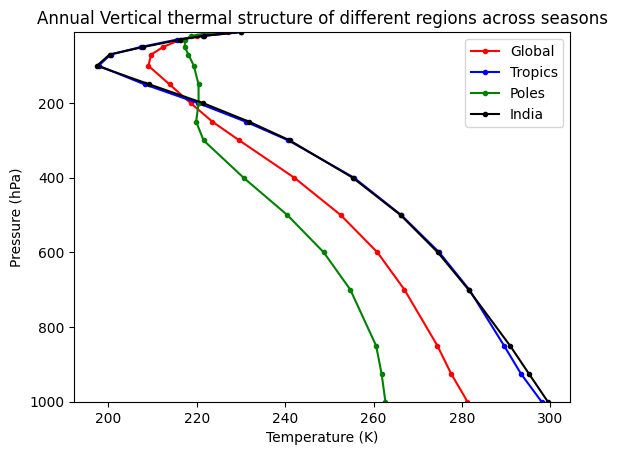

In [127]:
# plotting the annual data for each region

plt.plot(annual_datasets[0],pressure_levels_annual[0],'r.-',label='Global')
plt.ylim(max(pressure_levels_annual[0]),min(pressure_levels_annual[0]))
plt.plot(annual_datasets[1],pressure_levels_annual[1],'b.-',label='Tropics')
plt.ylim(max(pressure_levels_annual[1]),min(pressure_levels_annual[1]))
plt.plot(annual_datasets[2],pressure_levels_annual[2],'g.-',label='Poles')
plt.ylim(max(pressure_levels_annual[2]),min(pressure_levels_annual[2]))
plt.plot(annual_datasets[3],pressure_levels_annual[3],'k.-',label='India')
plt.ylim(max(pressure_levels_annual[3]),min(pressure_levels_annual[3]))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Annual Vertical thermal structure of different regions across seasons')
plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()

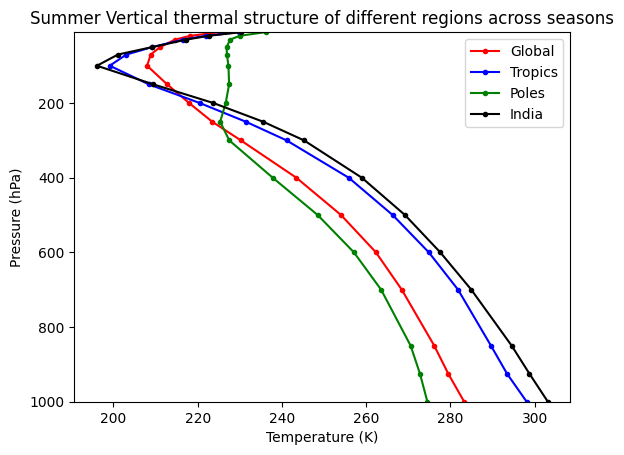

In [128]:
# plotting the summer data across the regions

plt.plot(summer_datasets[0],pressure_levels_summer[0],'r.-',label='Global')
plt.ylim(max(pressure_levels_summer[0]),min(pressure_levels_summer[0]))
plt.plot(summer_datasets[1],pressure_levels_summer[1],'b.-',label='Tropics')
plt.ylim(max(pressure_levels_summer[1]),min(pressure_levels_summer[1]))
plt.plot(summer_datasets[2],pressure_levels_summer[2],'g.-',label='Poles')
plt.ylim(max(pressure_levels_summer[2]),min(pressure_levels_summer[2]))
plt.plot(summer_datasets[3],pressure_levels_summer[3],'k.-',label='India')
plt.ylim(max(pressure_levels_summer[3]),min(pressure_levels_summer[3]))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Summer Vertical thermal structure of different regions across seasons')
plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()

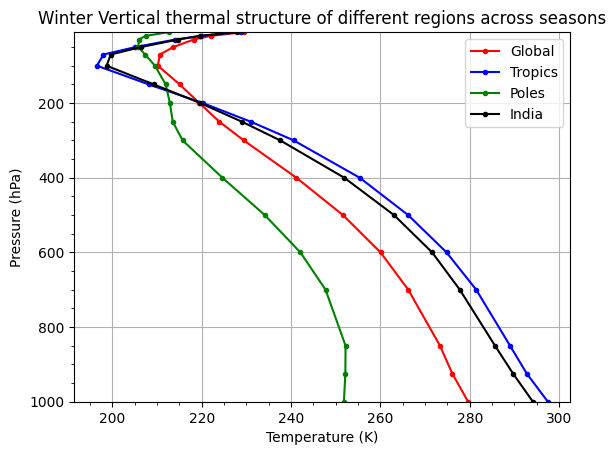

In [131]:
# plotting the winter data across the regions

plt.plot(winter_datasets[0],pressure_levels_winter[0],'r.-',label='Global')
plt.ylim(max(pressure_levels_winter[0]),min(pressure_levels_winter[0]))
plt.plot(winter_datasets[1],pressure_levels_winter[1],'b.-',label='Tropics')
plt.ylim(max(pressure_levels_winter[1]),min(pressure_levels_winter[1]))
plt.plot(winter_datasets[2],pressure_levels_winter[2],'g.-',label='Poles')
plt.ylim(max(pressure_levels_winter[2]),min(pressure_levels_winter[2]))
plt.plot(winter_datasets[3],pressure_levels_winter[3],'k.-',label='India')
plt.ylim(max(pressure_levels_winter[3]),min(pressure_levels_winter[3]))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Winter Vertical thermal structure of different regions across seasons')
plt.legend()
plt.minorticks_on()
plt.grid(True)
plt.show()